### Predict the Price of used cars with Odometer readings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [3]:
df1 = pd.read_csv('Odometer.csv')
df1

,Odometer,Price
0,37.4,14.6
1,44.8,14.1
2,45.8,14.0
3,30.9,15.6
4,31.7,15.6
...,...,...
95,36.2,14.8
96,34.2,14.6
97,33.2,14.5
98,39.2,14.7


In [59]:
Price = df1.Price
Odometer = df1.drop(["Price"],axis=1)

### Fit Linear Regression model

In [60]:
m1 = LinearRegression()
m1.fit(Odometer,Price)
m1.score(Odometer,Price)

0.6482954749384247

In [7]:
print(m1.intercept_, m1.coef_)

17.24872734291551 [-0.06686089]


In [61]:
yhat = m1.predict(Odometer)
df2 = df1.copy()
df2['prediction'] = yhat
df2

,Odometer,Price,prediction
0,37.4,14.6,14.748130
1,44.8,14.1,14.253360
2,45.8,14.0,14.186499
3,30.9,15.6,15.182726
4,31.7,15.6,15.129237
...,...,...,...
95,36.2,14.8,14.828363
96,34.2,14.6,14.962085
97,33.2,14.5,15.028946
98,39.2,14.7,14.627781


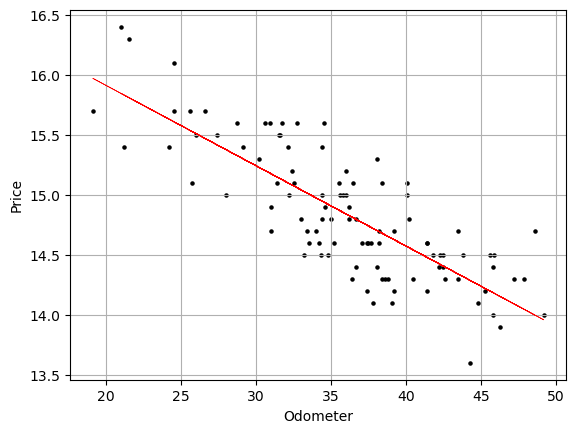

In [10]:
plt.figure()
plt.scatter(Odometer,Price,c='k',s=5)
plt.plot(Odometer,yhat,color = 'r',linewidth = 0.5)
plt.ylabel('Price')
plt.xlabel('Odometer')
plt.grid()

## Build the SVR Model

In [12]:
epsilon1 = 1.4
svr1 = SVR(kernel='linear',C=1.0, epsilon = epsilon1)
svr1.fit(Odometer, Price);
yhat1 = svr1.predict(Odometer)
df2['prediction1'] = yhat1
left1 = yhat1 + epsilon1
right1 = yhat1 - epsilon1

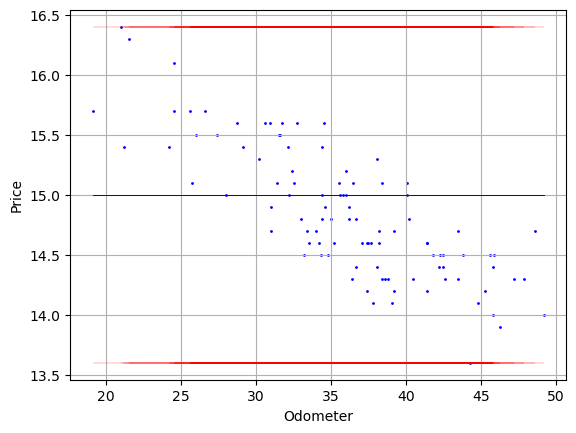

In [13]:
plt.figure()
plt.scatter(Odometer,Price,c='b',s=1)
plt.plot(Odometer,yhat1,color = 'b',linewidth = 0.5)
plt.plot(Odometer,left1,color = 'r',linewidth = 0.1)
plt.plot(Odometer,right1,color = 'r',linewidth = 0.1)
plt.ylabel('Price')
plt.xlabel('Odometer')
plt.grid()

In [62]:
epsilon2 = 0.5
svr2 = SVR(kernel='linear',C=1.0, 
           epsilon = epsilon2)
svr2.fit(Odometer, Price);
yhat2 = svr2.predict(Odometer)
df2['prediction2'] = yhat2
left2 = yhat2 + epsilon2
right2 = yhat2 - epsilon2

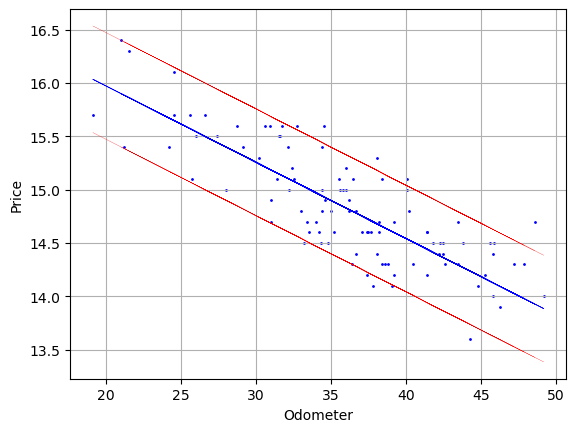

In [63]:
plt.figure()
plt.scatter(Odometer,Price,
            c='b',s=1)
plt.plot(Odometer,yhat2,
         color = 'b',
         linewidth = 0.5)
plt.plot(Odometer,left2,
         color = 'r',
         linewidth = 0.1)
plt.plot(Odometer,right2,
         color = 'r',
         linewidth = 0.1)
plt.ylabel('Price')
plt.xlabel('Odometer')
plt.grid()

In [68]:
epsilon2 = 0.25
svr2 = SVR(kernel='linear',C=1.0, 
           epsilon = epsilon2)
svr2.fit(Odometer, Price);
yhat2 = svr2.predict(Odometer)
df2['prediction2'] = yhat2
left2 = yhat2 + epsilon2
right2 = yhat2 - epsilon2

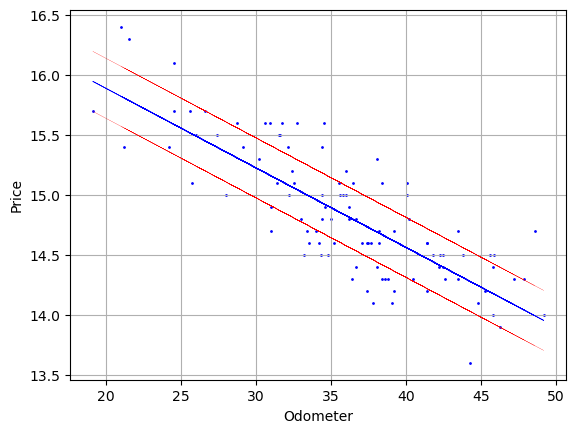

In [69]:
plt.figure()
plt.scatter(Odometer,Price,
            c='b',s=1)
plt.plot(Odometer,yhat2,
         color = 'b',
         linewidth = 0.5)
plt.plot(Odometer,left2,
         color = 'r',
         linewidth = 0.1)
plt.plot(Odometer,right2,
         color = 'r',
         linewidth = 0.1)
plt.ylabel('Price')
plt.xlabel('Odometer')
plt.grid()

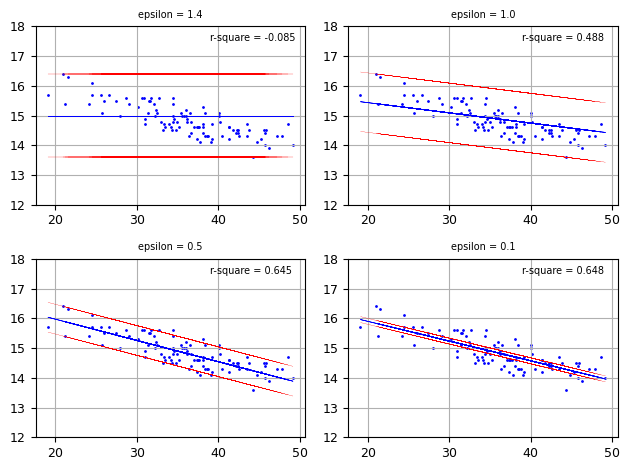

In [70]:
eps = [1.4,1.0,0.5,0.1]

plt.figure()
for j in range(4):
    svr = SVR(kernel='linear',C=1.0, 
              epsilon = eps[j])
    svr.fit(Odometer, Price);
    yhat = svr.predict(Odometer)
    left = yhat + eps[j]
    right = yhat - eps[j]    
    
    
    plt.subplot(2,2,j+1)
    plt.scatter(Odometer,Price,c='b',s=1)
    plt.plot(Odometer,yhat,color = 'b',
             linewidth = 0.5)
    plt.plot(Odometer,left,color = 'r',
             linewidth = 0.1)
    plt.plot(Odometer,right,color = 'r',
             linewidth = 0.1)
    r2=round(svr.score(Odometer,Price),3)
    plt.annotate('r-square = {}'.format(r2),
                 (39,17.5),fontsize=7)
    plt.title('epsilon = {}'.format(eps[j]),
              fontsize=7)
    plt.xticks(fontsize=9, rotation=0)
    plt.yticks(fontsize=9, rotation=0)
    plt.ylim(12,18)
    plt.tight_layout()
    plt.grid()

In [ ]:
# Change C values (keeping epsilon = 1.0)

In [46]:
Cs = [10.0,5.0,1.0,0.01]
eps = 1

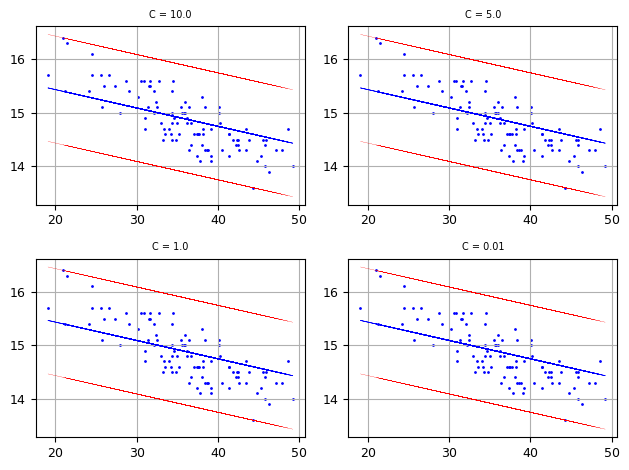

In [47]:
#fig, ax = plt.subplots(2,2,sharex='col',sharey='row')
plt.figure()
for j in range(4):
    svr = SVR(kernel='linear',C=Cs[j],epsilon = eps)
    svr.fit(Odometer, Price);
    yhat = svr.predict(Odometer)
    left = yhat + eps
    right = yhat - eps    
    plt.subplot(2,2,j+1)
    plt.scatter(Odometer,Price,c='b',s=1)
    plt.plot(Odometer,yhat,color = 'b',linewidth = 0.5)
    plt.plot(Odometer,left,color = 'r',linewidth = 0.1)
    plt.plot(Odometer,right,color = 'r',linewidth = 0.1)
    plt.title('C = {}'.format(Cs[j]),fontsize=7)
    plt.xticks(fontsize=9, rotation=0)
    plt.yticks(fontsize=9, rotation=0)
#    plt.ylim(12,18)
    plt.tight_layout()
    plt.grid()

For the given 𝜀 value, SVR fits the flattest possible linear function
trying to capture most data points 

In [ ]:
# It looks that there is no change in the fitted line